## ĐỒ ÁN CUỐI KÌ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

### Thành viên:
- 20120219: Nguyễn Minh Trí
- 20120357: Nguyễn Đức Minh Quân
- 20120633: Viên Hải Yến
- 20120634: Lê Minh Trí


## **Mô tả đồ án:**
- Thực hiện quy trình khoa học dữ liệu với dữ liệu được chọn, cụ thể ở đây là lấy dữ liệu thực tế là điểm thi THPTQG của các năm 2017-2022, từ đó trả lời các câu hỏi liên quan, cũng như thống kê về số liệu được ghi nhận để dễ dàng có những đánh giá khách quan trong những dữ liệu đã thu thập.

## Thu thập dữ liệu từ web
Đào từ web xuống tất cả các kết quả thi của thí sinh từ năm [2015-2022]

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

### MỞ RỘNG NẾU CÓ THỂ MUỐN CÀO DỮ LIỆU
- Đường dẫn để có thể tra cứu điểm thi thptqg theo năm: https://diemthi.vnanet.vn/BTT-tra-cuu-diem-thi-THPT-2019
- Đường dẫn để lấy api của từng học sinh của từng năm: https://diemthi.vnanet.vn/Home/SearchBySobaodanhFile?code=02070045&nam=2019

In [12]:
df_cities = pd.read_csv('./[2017-2022] thptqg-data/Tinh.csv')
df_cities.head()

,MaTinh,TenTinh
0,1,THÀNH PHỐ HÀ NỘI
1,2,THÀNH PHỐ HỒ CHÍ MINH
2,3,THÀNH PHỐ HẢI PHÒNG
3,4,THÀNH PHỐ ĐÀ NẴNG
4,5,TỈNH HÀ GIANG


In [13]:
years=[2019,2021,2021,2022]
subjects=["Toan","Van","Ngoai ngu","Ly","Sinh","Hoa","Lich su","Dia ly","GDCD"]

In [14]:
sum=0
df_list=[]
for year in range(2017,2023):
    df_year=pd.read_csv('./[2017-2022] thptqg-data/{}.csv'.format(year))
    df_year.rename(columns = {"Vat ly" : "Ly"}, inplace=True)
    sum+=len(df_year)
    df_list.append(df_year)
df=pd.concat(df_list)

In [15]:
# df.to_csv('2017-2022.csv',index=False)
df.head(10)

,SBD,MaTinh,Toan,Van,Ly,Hoa,Sinh,Lich su,Dia ly,GDCD,Ngoai ngu,Year
0,1000001,1,6.4,6.00,NaN,NaN,NaN,4.00,6.00,7.25,8.8,2017
1,1000002,1,6.0,7.00,NaN,NaN,NaN,4.50,8.50,8.75,7.6,2017
2,1000003,1,5.6,7.25,NaN,NaN,NaN,4.50,6.00,7.00,8.4,2017
3,1000004,1,8.2,7.25,NaN,NaN,NaN,6.50,8.75,8.25,9.0,2017
4,1000005,1,7.8,5.75,NaN,NaN,NaN,5.00,7.25,7.25,9.4,2017
5,1000007,1,6.4,7.75,NaN,NaN,NaN,2.50,5.50,7.50,9.0,2017
6,1000008,1,8.8,7.75,NaN,NaN,NaN,6.50,7.00,8.00,6.8,2017
7,1000009,1,8.4,7.50,NaN,NaN,NaN,5.00,5.25,9.00,8.8,2017
8,1000011,1,5.0,6.00,NaN,NaN,NaN,6.50,8.25,9.25,9.2,2017
9,1000012,1,6.2,6.00,NaN,NaN,NaN,5.25,7.00,8.00,7.8,2017


## Khám phá dữ liệu

#### Số dòng và cột của dữ liệu

In [16]:
num_rows,num_cols=df.shape
print('Số cột : {}'.format(num_cols))
print('Số dòng: {}'.format(num_rows))

Số cột : 12
Số dòng: 5204079


#### Kiểm tra dòng trùng

In [17]:
have_duplicated_rows=df.duplicated().any()

if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


#### Dữ liệu có bị thiếu không ?

In [18]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio[missing_ratio > 0]

Toan         0.009951
Van          0.020525
Ly           0.624088
Hoa          0.621225
Sinh         0.629043
Lich su      0.362900
Dia ly       0.373500
GDCD         0.459544
Ngoai ngu    0.120188
dtype: float64

***Lí do dẫn đến những thiếu sót của dữ liệu, gồm 2 nguyên nhân chính***
- Là do các trục trặc trong ngày thi dẫn đến việc không có điểm (các lí do được nêu ra: tai nạn, tới trễ giờ da các yếu tố khách quan hay chủ quan)
- Lí do thứ 2 thường xuất hiện với các tổ hợp môn: nếu trống thì sẽ trống cả 3 môn trong cùng 1 tổ hợp vì thí sinh không tham gia tổ hợp môn đó

#### Ý nghĩa của từng dòng
- Là điểm thi THPTQG của các thí sinh, mỗi dòng là riêng biệt với nhau và sẽ không xuất hiện tình trạng trùng
- Các thí sinh có thể đến từ các tỉnh thành khác nhau, có mã số iêng biệt ở từng năm

In [19]:
print('Có tổng cộng là {number} học sinh tham gia kì thi THPTQG trên khắp cả nước'.format(number=num_rows))
print('Số lượng các tỉnh tham gia là {number} tỉnh'.format(number=len(df['MaTinh'].unique())))

Có tổng cộng là 5204079 học sinh tham gia kì thi THPTQG trên khắp cả nước
Số lượng các tỉnh tham gia là 63 tỉnh


#### Ý nghĩa của từng cột

In [20]:
# Danh sách các cột là:
for i in df.columns:
    print(i, end = ", ")

SBD, MaTinh, Toan, Van, Ly, Hoa, Sinh, Lich su, Dia ly, GDCD, Ngoai ngu, Year, 


|Tên cột   |Ý nghĩa   |
|---|---|
|SBD  |Số báo danh của thí sinh (có thể bị trùng ở các năm khác nhau), trong 1 năm không tồn tại 2 SBD giống nha   |
|Toan   |Điểm môn Toán  |
|Van   |Điểm môn Ngữ văn   |
|Ngoai ngu   |Điểm môn Ngoại ngữ  (Có thể là Tiếng Anh, Tiếng Nhật, Tiếng Trung ,...) |
|Ly   |Điểm môn Vật lý   |
|Hoa   |Điểm môn Hóa học   |
|Sinh   |Điểm môn Sinh học   |
|Lich su   |Điểm môn Sử   |
|Dia ly   |Điểm môn Dịa   |
|GDCD   |Điểm môn Giáo dục công dân   |
|MaTinh   |Mã tỉnh dự thi   |




#### Mỗi cột hiện đang có kiểu dữ liệu gì? 

In [21]:
df.dtypes

SBD            int64
MaTinh         int64
Toan         float64
Van          float64
Ly           float64
Hoa          float64
Sinh         float64
Lich su      float64
Dia ly       float64
GDCD         float64
Ngoai ngu    float64
Year           int64
dtype: object

## Đặt câu hỏi và trả lời

<u>***Câu 1:***</u>
Tìm số lượng thí sinh tham dự của các tỉnh vào mỗi năm

In [22]:
years = df['Year'].unique()
cities = df_cities['MaTinh'].unique()

**Lưu ý:** Tồn tại những năm có những tỉnh không được ghi nhận số liệu, điều này là do mất số liệu lưu trữ trong năm đó

In [23]:
for year in years:
    col_year_city_participants_number =[]
    for city in cities:
        col_year_city_participants_number.append(df.loc[(df['Year']==year) & (df['MaTinh']==city),'SBD'].count())
    df_cities[year] =  pd.Series(col_year_city_participants_number)

df_cities

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
0,1,THÀNH PHỐ HÀ NỘI,64999,38099,74277,78860,100688,96942
1,2,THÀNH PHỐ HỒ CHÍ MINH,64999,78321,0,74451,86224,84594
2,3,THÀNH PHỐ HẢI PHÒNG,18579,5099,18484,18533,23241,22399
3,4,THÀNH PHỐ ĐÀ NẴNG,11022,6099,10110,0,12631,12574
4,5,TỈNH HÀ GIANG,5563,3099,5155,5627,5603,5863
...,...,...,...,...,...,...,...,...
58,60,TỈNH BẠC LIÊU,4945,5370,5355,5589,6331,6412
59,61,TỈNH CÀ MAU,7684,9275,9292,9637,10914,10691
60,62,TỈNH ĐIỆN BIÊN,5302,5481,5287,5608,6268,6412
61,63,TỈNH ĐĂK NÔNG,6020,6361,6292,6212,6679,6852


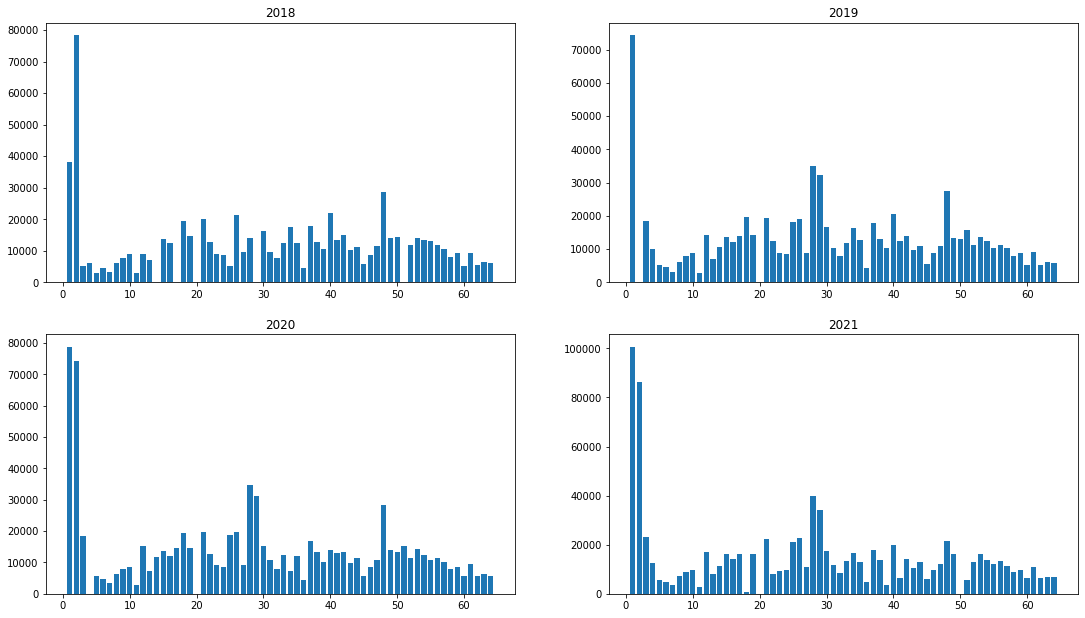

In [24]:
fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])

x = np.arange(1,5)
a[0][0].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2018]))
a[0][0].set_title('2018')
a[0][1].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2019]))
a[0][1].set_title('2019')
a[1][0].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2020]))
a[1][0].set_title('2020')
a[1][1].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2021]))
a[1][1].set_title('2021')
plt.show()

### <span style="color:red">**Lưu ý**</span>
Những thành phố có năm không thu thập được dữ liệu

In [25]:
df_cities[(df_cities[2018]==0) | (df_cities[2019]==0) | (df_cities[2020]==0) |(df_cities[2021]==0)]

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
1,2,THÀNH PHỐ HỒ CHÍ MINH,64999,78321,0,74451,86224,84594
3,4,THÀNH PHỐ ĐÀ NẴNG,11022,6099,10110,0,12631,12574
13,14,TỈNH SƠN LA,9556,0,10551,11626,11384,11325
16,17,TỈNH QUẢNG NINH,13538,0,14108,14547,16367,15623
27,29,TỈNH NGHỆ AN,30802,0,32242,31072,34327,36563
48,50,TỈNH ĐỒNG THÁP,12553,14367,13098,13386,0,15037
49,51,TỈNH AN GIANG,14060,0,15784,15239,5544,18573


<u>***Câu 2:***</u>
Tính trung bình số lượng thí sinh tham gia của mỗi tỉnh\
Cho biết tình thành nào có số lượng thí sinh tham giao cao nhất / thấp nhất

In [26]:
# vì có những số liệu của các tp bị bỏ lỡ nên hiện tại sẽ sử dụng tới hàm mean tự định nghĩa
# cho phép những ô bị mất dữ liệu không tính vào tổng số tránh làm chênh lệnh
import math
def custom_mean_function(arr):
    arr = np.array(arr)
    sum = 0
    for i in arr:
        sum+=i
    return sum/len(arr[arr!=0])


In [27]:
avg_number_participants = []
len(df_cities)
for i in range(len(df_cities)):
    avg_number_participants.append(custom_mean_function(df_cities.loc[i,[2018,2018,2020,2021]]))

In [28]:
max_avg = max(avg_number_participants)
min_avg = min(avg_number_participants)

#### Tỉnh thành có nhiều thí sinh trung bình dự thi nhất là:

In [29]:
df_cities.iloc[[avg_number_participants.index(max_avg)]]

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
1,2,THÀNH PHỐ HỒ CHÍ MINH,64999,78321,0,74451,86224,84594


#### Tỉnh thành có ít thí sinh trung bình dự thi ít nhất là:

In [30]:
df_cities.iloc[[avg_number_participants.index(min_avg)]]

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
10,11,TỈNH BẮC KẠN,2830,2866,2849,2851,2893,3053


<u>***Câu hỏi 3:***</u>
Tìm và nhận xét số lượng thí sinh thi đậu tốt nghiệp\
Biết là để thõa điều kiện tốt nghiệp:
- Các môn tiên quyết bắt buộc và các môn thành phần trong bài thi Tổ hợp luôn phải lớn hơn 1.0
- Tổng điểm xét tốt nghiệp phải lớn hơn 5.0 -> ở trường hợp này mình không xét tới vì điểm tốt nghiệp có 30% là điểm trung bình trong trường

In [31]:
passed_cdt_1 = (df['Toan']>1 )&(df['Van']>1 )&(df['Ngoai ngu']>1 )
passed_cdt_2 = (df['Ly']>1 )&(df['Hoa']>1 )&(df['Sinh']>1 )
passed_cdt_3 = (df['Lich su']>1) & (df['Dia ly']>1 ) & (df['GDCD']>1 )


In [32]:
df_passed = df[passed_cdt_1 & (passed_cdt_2 | passed_cdt_3)]
df_passed

,SBD,MaTinh,Toan,Van,Ly,Hoa,Sinh,Lich su,Dia ly,GDCD,Ngoai ngu,Year
0,1000001,1,6.4,6.00,NaN,NaN,NaN,4.00,6.00,7.25,8.8,2017
1,1000002,1,6.0,7.00,NaN,NaN,NaN,4.50,8.50,8.75,7.6,2017
2,1000003,1,5.6,7.25,NaN,NaN,NaN,4.50,6.00,7.00,8.4,2017
3,1000004,1,8.2,7.25,NaN,NaN,NaN,6.50,8.75,8.25,9.0,2017
4,1000005,1,7.8,5.75,NaN,NaN,NaN,5.00,7.25,7.25,9.4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995376,64006555,64,6.2,4.75,NaN,NaN,NaN,5.00,6.00,7.00,2.8,2022
995377,64006584,64,8.4,6.75,NaN,NaN,NaN,6.50,6.75,9.00,4.6,2022
995378,64006576,64,6.6,5.25,NaN,NaN,NaN,4.50,5.50,8.50,3.2,2022
995379,64006583,64,5.0,6.50,NaN,NaN,NaN,6.75,7.50,8.50,3.8,2022


In [33]:
df_city_passed = pd.DataFrame()
df_city_passed['MaTinh'] = df_cities['MaTinh']

for year in years:
    city_passed_year =[]
    for city in cities:
        city_passed_year.append(df_passed.loc[(df_passed['Year']==year) & (df_passed['MaTinh']==city),'SBD'].count())
    df_city_passed[year] =  pd.Series(city_passed_year)

df_city_passed

,MaTinh,2017,2018,2019,2020,2021,2022
0,1,55007,33216,64034,66582,85208,79287
1,2,54663,67267,0,64848,74530,71915
2,3,16042,4747,16640,16563,20416,19444
3,4,9346,5656,9012,0,11064,10793
4,5,4494,2799,4457,4847,4916,5132
...,...,...,...,...,...,...,...
58,60,4311,4896,4903,5048,5698,5707
59,61,6863,8467,8849,9128,10537,10280
60,62,4060,4376,4598,4692,5246,5481
61,63,5209,5736,5812,5719,6237,6315


#### Biểu đồ cột cho thấy mối quan hệ của việc đậu và tham gia kì thi trong năm 2018

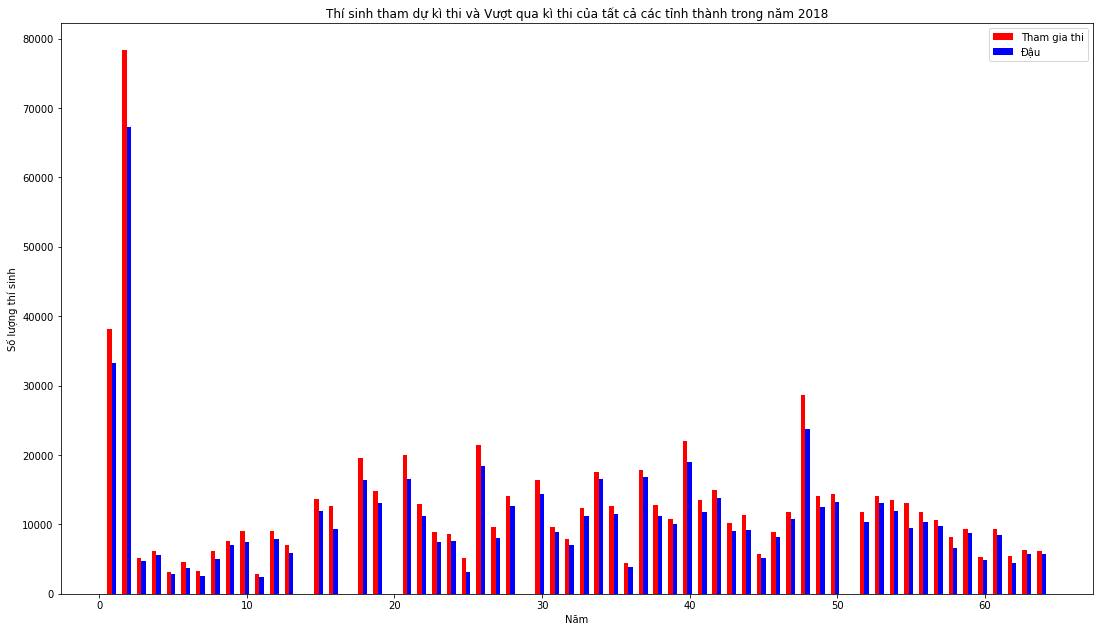

In [34]:
fig,a =  plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])


a.bar(np.array(df_cities['MaTinh'])-0.3, df_cities[2018],color='red', width=0.3, label='Tham gia thi')
a.bar(np.array(df_cities['MaTinh']), df_city_passed[2018], width=0.3,color='blue', label='Đậu')

a.set_ylabel('Số lượng thí sinh')
a.set_xlabel('Năm')
a.set_title("Thí sinh tham dự kì thi và Vượt qua kì thi của tất cả các tỉnh thành trong năm 2018")
a.legend()

### Tỉ Lệ thi đậu tốt nghiệp

In [35]:
df_cities

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
0,1,THÀNH PHỐ HÀ NỘI,64999,38099,74277,78860,100688,96942
1,2,THÀNH PHỐ HỒ CHÍ MINH,64999,78321,0,74451,86224,84594
2,3,THÀNH PHỐ HẢI PHÒNG,18579,5099,18484,18533,23241,22399
3,4,THÀNH PHỐ ĐÀ NẴNG,11022,6099,10110,0,12631,12574
4,5,TỈNH HÀ GIANG,5563,3099,5155,5627,5603,5863
...,...,...,...,...,...,...,...,...
58,60,TỈNH BẠC LIÊU,4945,5370,5355,5589,6331,6412
59,61,TỈNH CÀ MAU,7684,9275,9292,9637,10914,10691
60,62,TỈNH ĐIỆN BIÊN,5302,5481,5287,5608,6268,6412
61,63,TỈNH ĐĂK NÔNG,6020,6361,6292,6212,6679,6852


In [36]:
df_city_passed.loc[5,[2018]]
df_city_passed.loc[5,[2018]]
df_cities.loc[5,[2018]]!=0

2018    True
Name: 5, dtype: bool

In [37]:
percentage_passed_city = []
year = 2018
for i in range(len(df_cities)):
    percent = math.nan
    if(df_cities.loc[i,[year]].iloc[0] !=0 ):
        percent = df_city_passed.loc[i,year] *1.0 / df_cities.loc[i,year]
    percentage_passed_city.append(percent)

#### Tình thành có tỉ lệ thí sinh đỗ cao nhất và thấp nhất năm 2018 là

In [38]:
max_ratio=max(percentage_passed_city)
min_ratio=min(percentage_passed_city)

In [39]:
# CAO NHẤT
print('Tỉ lệ: ', round(max_ratio*100,2), '%')
print(df_cities.iloc[percentage_passed_city.index(max_ratio)].loc[['TenTinh']])

Tỉ lệ:  94.66 %
TenTinh    TỈNH QUẢNG NAM
Name: 32, dtype: object


In [40]:
# CAO NHẤT
print('Tỉ lệ: ', round(min_ratio*100,2),'%')
print(df_cities.iloc[percentage_passed_city.index(min_ratio)].loc[['TenTinh']])

Tỉ lệ:  61.44 %
TenTinh    TỈNH NAM ĐỊNH
Name: 23, dtype: object


<u>***Câu hỏi 4:***</u> \
Cho biết điểm thi môn Toán trên khắp cả nước
Trực quan hóa sự thay đổi điểm số trung bình của tất cả các môn thi

In [41]:
math_17 = df[df['Year']==2017].loc[:,'Toan']
math_18 = df[df['Year']==2018].loc[:,'Toan']
math_19 = df[df['Year']==2019].loc[:,'Toan']
math_20 = df[df['Year']==2020].loc[:,'Toan']
math_21 = df[df['Year']==2021].loc[:,'Toan']
math_22 = df[df['Year']==2022].loc[:,'Toan']

In [42]:
language_17 = df[df['Year']==2017].loc[:, 'Ngoai ngu']
language_18 = df[df['Year']==2018].loc[:, 'Ngoai ngu']
language_19 = df[df['Year']==2019].loc[:, 'Ngoai ngu']
language_20 = df[df['Year']==2020].loc[:, 'Ngoai ngu']
language_21 = df[df['Year']==2021].loc[:, 'Ngoai ngu']
language_22 = df[df['Year']==2022].loc[:, 'Ngoai ngu']

#### Trực quan hóa để thấy sự tương quan của tất cả các môn qua các năm

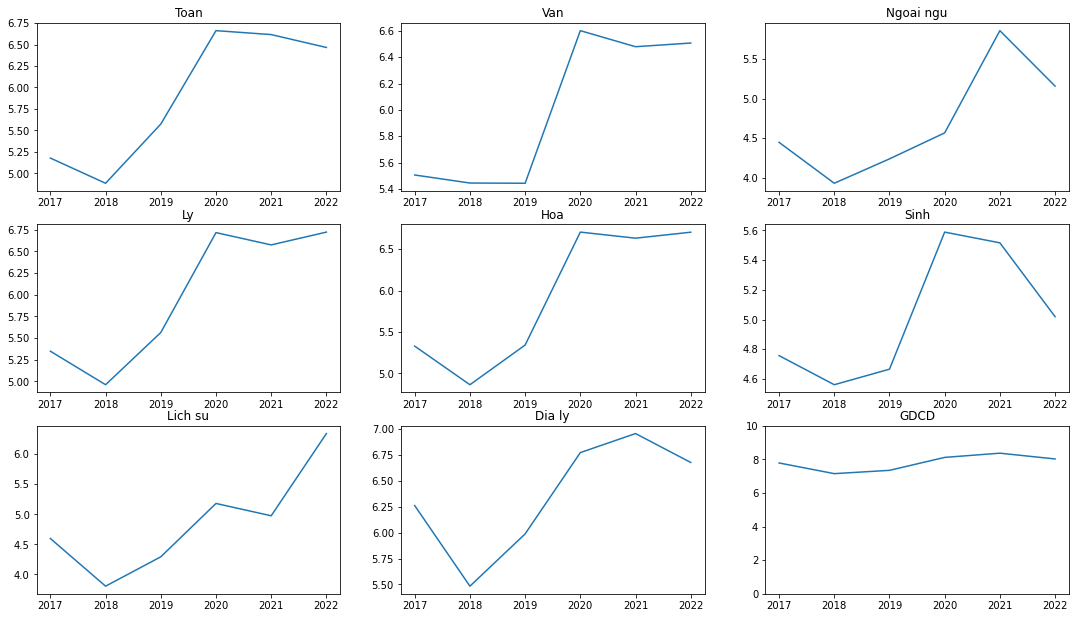

In [43]:
fig,a =  plt.subplots(3,3)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array([2017,2018,2019,2020,2021,2022])

all_subjects =[ 'Toan', 'Van', 'Ngoai ngu', 'Ly',  'Hoa','Sinh', 'Lich su','Dia ly', 'GDCD']
i=0
for subject in all_subjects:
       mean_years = []
       for year in years:
              mean_years.append(np.mean(df[df['Year']==year][subject]))

       a[int(i/3)][i%3].plot(x,np.array(mean_years))
       a[int(i/3)][i%3].set_title(subject)
       plt.ylim(0,10)
       i+=1
plt.show()

**Câu hỏi 5**
### Biểu đồ thể hiển phổ điểm của môn Toán và Ngoại ngữ qua các năm

Text(0.5, 1.0, '2021')

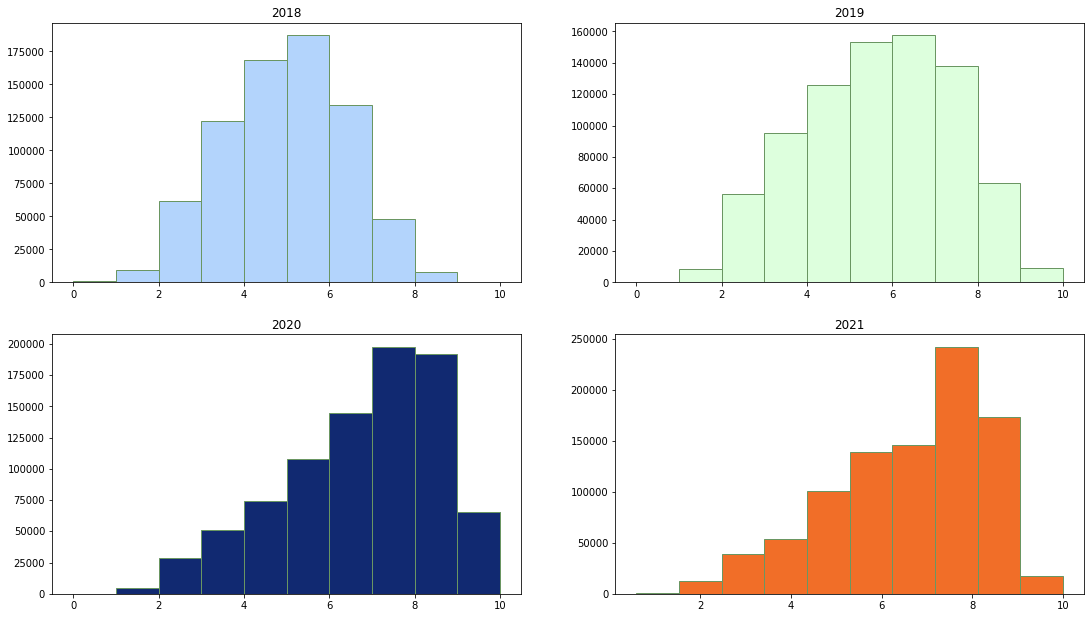

In [44]:
#Môn TOÁN

fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)

c = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
       7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8,10.0]

a[0][0].hist(math_18,edgecolor="#6A9662",color="#B3D4FC")
a[0][0].set_title('2018')
a[0][1].hist(math_19,edgecolor="#6A9662",color="#DDFFDD")
a[0][1].set_title('2019')
a[1][0].hist(math_20,edgecolor="#6A9662",color="#112971")
a[1][0].set_title('2020')
a[1][1].hist(math_21,edgecolor="#6A9662",color="#F16E28")
a[1][1].set_title('2021')

In [45]:
df[df['Toan']==3.8]

,SBD,MaTinh,Toan,Van,Ly,Hoa,Sinh,Lich su,Dia ly,GDCD,Ngoai ngu,Year
23,1000028,1,3.8,5.00,NaN,NaN,NaN,3.75,6.75,7.75,6.8,2017
185,1000212,1,3.8,7.75,NaN,NaN,NaN,4.25,6.75,7.25,5.2,2017
241,1000276,1,3.8,5.50,NaN,NaN,NaN,2.00,4.75,6.50,3.6,2017
249,1000284,1,3.8,6.50,NaN,NaN,NaN,3.00,8.00,7.25,6.8,2017
295,1000331,1,3.8,6.00,NaN,NaN,NaN,3.75,4.75,7.00,4.2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
994731,64005930,64,3.8,4.50,NaN,NaN,NaN,4.00,4.25,6.50,3.0,2022
994739,64005940,64,3.8,5.25,NaN,NaN,NaN,6.25,7.50,8.75,2.8,2022
994810,64005985,64,3.8,4.50,NaN,NaN,NaN,7.25,6.50,8.75,2.2,2022
994813,64006009,64,3.8,3.00,NaN,NaN,NaN,4.75,5.25,6.25,3.0,2022


Text(0.5, 1.0, '2021')

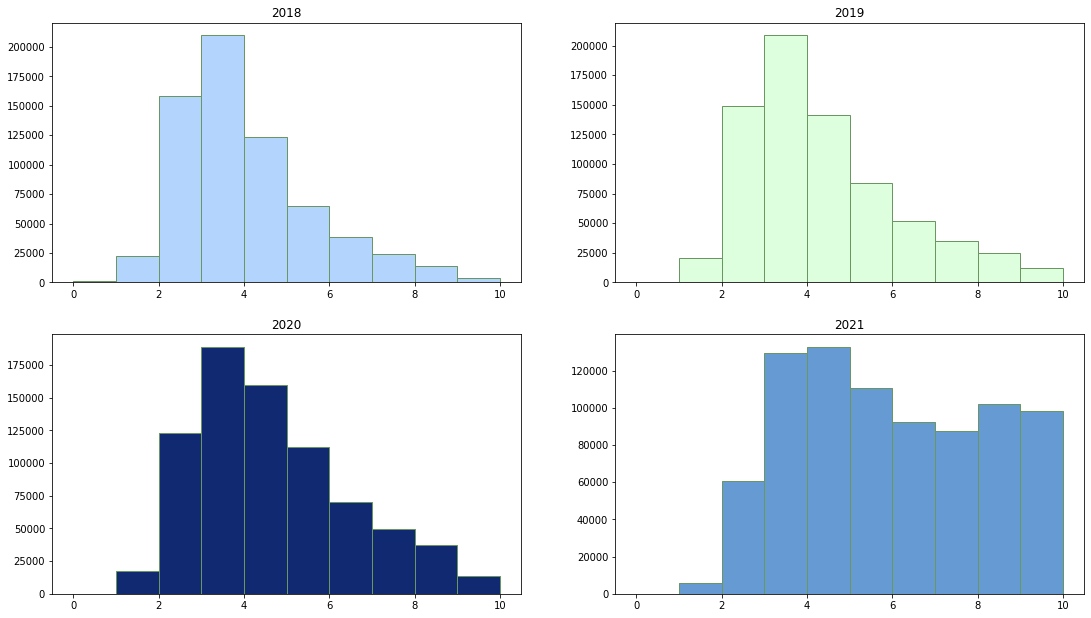

In [46]:
#Môn Ngoại ngữ

fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])

x = np.arange(1,5)
a[0][0].hist(language_18,edgecolor="#6A9662",color="#B3D4FC")
a[0][0].set_title('2018')
a[0][1].hist(language_19,edgecolor="#6A9662",color="#DDFFDD")
a[0][1].set_title('2019')
a[1][0].hist(language_20,edgecolor="#6A9662",color="#112971")
a[1][0].set_title('2020')
a[1][1].hist(language_21,edgecolor="#6A9662",color="#659AD3")
a[1][1].set_title('2021')

### So sánh phổ điểm của môn Toán và Ngoại ngữ theo sự thay đổi từng năm theo đồ thị đã được trực quan
Liệu có thể nói như một số bài báo là Ngoại ngữ (cụ thể là tiếng Anh) hiện nay không được các bạn trẻ ưu tiên lấy đó để xét điểm vào đại học ??

**Trả lời**


ở các bài thi môn toán qua từng năm có sự thay đổi rõ rệt, vẫn là biểu đồ bị lệch về bên phải cho thấy điểm trung binh đạt được là khá cao và có xu hướng đang dần tăng lên, điều này có thể được giải thích theo 2 hướng tích cực và tiêu cực
- Tích cực là: Toán là một môn bắt buộc và tất cả các thí sinh tham gia luôn trong tâm thế đạt được điểm cao nhất có thể để dễ dàng hơn cho các ôn sau, nó cũng là tiền đề để học tốt các bộ môn về tự nhiên
- Tiêu cực là: Do vấn đề về dịch bênh cũng như việc xét tuyển ĐH đã không còn quá phụ thuộc vào điểm số của kì thi THPTQG nên đề có xu hướng dễ chịu hơn, nghiêng về hướng muốn học sinh được tốt nghiệp với điểm số cao và không quan tâm đến tình trạng *lạm phát điểm*

Bài thi Ngoại ngữ thì lại là đồ thị lệch về bên trái thể hiện việc điểm số không hề cao và phần nhiều là các trường họp dưới trung bình, có thể thấy qua các bài báo thường đăng về việc có >40% học sinh tham gia THPTQG có điểm số thấp. Tuy nhiên điểm liệt thấp cho thấy đề thi vẫn đảm bảo đủ điều kiện cho HS tốt nghiệp.
- Ở các năm trước, điểm số có phần rất thấp so với năm 2021, điều này được lí giải là do hiện tại xu hướng xét tuyển bằng điểm thi trong trường và các bằng Anh Văn Quốc tế là vô cùng phổ biến trong hiện tại, phải gọi là xu thế cho các bạn không muốn phải khó khăn trong việc ôn luyện nhiều môn mòa chỉ cần quan tâm vào bằng tiếng anh là được
- Ỏ năm 2021, điểm số tăng cao vượt trội hơn cả với môn toán
- Tỉnh trạng này còn có thể là do đề thi hiện tại được đánh giá là dễ hơn so với các năm trước và các môn thi tổ hợp (tự nhiên) trong cùng năm

<u>***Câu hỏi 6***</u>\
So sánh số lượng người thi ban Khoa học tự nhiên và Khoa học xã hội qua các năm

Cho biết số lượng thí sinh tham dự bài thi ban **KHTN** hoặc **KHXH** là các học sinh tham gia thi cả 3 môn của tổ hợp
- KHTN: Lí Hóa Sinh
- KHXH: Sử Địa GDCD

In [47]:
science_subjects = ['Ly', 'Hoa', 'Sinh']
social_subjects = ['Lich su', 'Dia ly', 'GDCD']

Số lượng thí sinh chọn bài thi ban **KHTN**

In [48]:
keys=science_subjects.copy()
keys.append("Year")
df_science=df[keys].copy()
df_science.dropna(inplace=True)
count_science=len(df_science)
count_science

1903113

Số lượng thí sinh chọn bài thi ban **KHXH**

In [49]:
keys=social_subjects.copy()
keys.append("Year")
df_social=df[keys].copy()
df_social.dropna(inplace=True)
count_social=len(df_social)
count_social

2810620

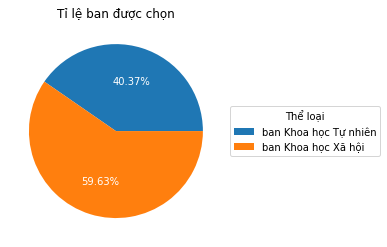

In [50]:
# fig = plt.figure()
graph_labels = ['ban Khoa học Tự nhiên', 'ban Khoa học Xã hội']
plt.pie([count_science,count_social], autopct='%1.2f%%', textprops={'color':"w"})
plt.legend(graph_labels,
          title="Thể loại",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Tỉ lệ ban được chọn")
plt.show()

Từ dữ liệu trên ta có thể kết luận, số lượng học sinh chọn thi tổ hợp môn Khoa học xã hội chiến tỉ lệ lớn hơn so với những môn Khoa học Tự nhiên, một số nguyên nhân chính được chỉ ra như sau:
- Tỉ lệ thí sinh ưu tiên lựa chọn bài thi khoa học xã hội là giải pháp an toàn giúp các em đủ điều kiện để xét tốt nghiệp trung học phổ thông
- Có nhiều vùng miền có hoàn cảnh kinh tế - xã hội còn khó khăn thường không thể bằng được với các tỉnh miền xuôi về chất lượng giaingr dạy các môn xã hội.

### Vẽ biểu đồ so sánh số lượng bài thi các ban trong mỗi năm

In [51]:
df1=df_science['Year'].value_counts().to_frame().rename(columns={"Year":"ban Khoa học Tự Nhiên"})
df2=df_social['Year'].value_counts().to_frame().rename(columns={"Year":"ban Khoa học Xã hội"})
df_vis=df1.merge(df2,right_index=True,left_index=True).reset_index(names=['Year'])
df_vis=df_vis.melt(id_vars=['Year'],var_name="ToHop",value_name="SoLuong")

<AxesSubplot: xlabel='Year', ylabel='SoLuong'>

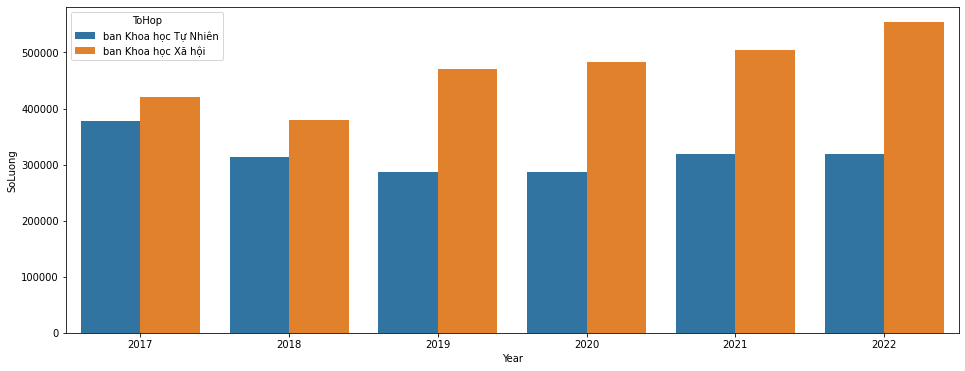

In [52]:
plt.subplots(figsize=(16,6))
sns.barplot(data=df_vis,
            x="Year",
            y="SoLuong",
            hue="ToHop")

***Nhận xét:*** Sau từng năm, sự chênh lệch của số thí sinh tham dự 2 tổ hợp càng có sự cách biệt (KHXH chiếm ưu thế trội hơn hẳn)

<u>***Câu hỏi 7***</u>\
So sánh số lượng các bài thi tổ hợp và xem tổ hợp nào hiện đang là xu thế và có điểm số lấn át với những tổ hợp khác

***Lưu ý:*** Trong giai đoạn chuẩn bị thi, thí sinh thường tập trung ôn các môn thi trong tổ hợp mình chọn

Ta xem xét độ tương quan điểm của các môn thi

<AxesSubplot: >

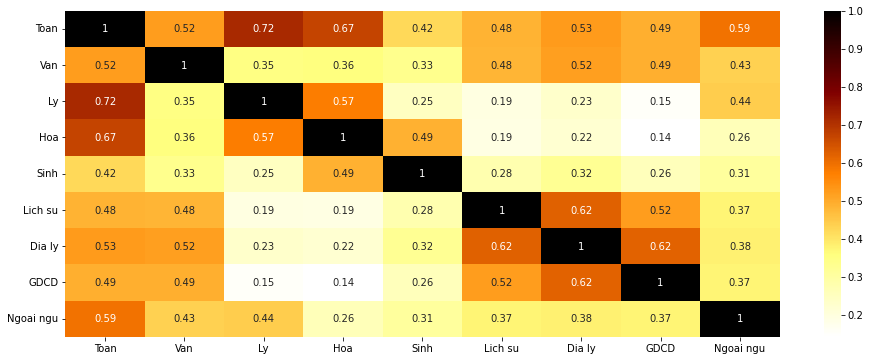

In [53]:
plt.figure(figsize=(16,6))
sns.heatmap(df.drop(columns=["SBD","MaTinh","Year"]).corr(),annot=True,cmap='afmhot_r')

### Từ 3 môn cơ bản là Toán, Văn, Ngoại ngữ ta sẽ chọn ra các tổ hợp có độ liên quan cao nhất với 3 môn này

In [54]:
df1=df[subjects].copy().corr()
base_subject=["Toan","Van","Ngoai ngu"]
khoi=[]
def gen_combination(list):
    result=[]
    for x in range(0,len(list)-1):
        for y in range(x+1,len(list)):
            result.append([list[x],list[y]])
    return result
for subject in base_subject:
    related_sub=list(df1[subject].sort_values(ascending=False).index)
    related_sub.remove(subject)

    top_related_sub=related_sub[:3]
    
    for x in gen_combination(top_related_sub):
        x.insert(0,subject)
        khoi.append(x)
khoi

[['Toan', 'Ly', 'Hoa'],
 ['Toan', 'Ly', 'Ngoai ngu'],
 ['Toan', 'Hoa', 'Ngoai ngu'],
 ['Van', 'Toan', 'Dia ly'],
 ['Van', 'Toan', 'GDCD'],
 ['Van', 'Dia ly', 'GDCD'],
 ['Ngoai ngu', 'Toan', 'Ly'],
 ['Ngoai ngu', 'Toan', 'Van'],
 ['Ngoai ngu', 'Ly', 'Van']]

### Tính toán điểm trung bình và số lượng của các tổ hợp

Tổ hợp của thí sinh chọn sẽ được dự đoán dựa trên 3 môn có số điểm cao nhất của thí sinh.\
Giả thuyết đặt ra là thí sinh sẽ lựa chọn tổ hợp môn có điểm cao nhất để xét.

In [55]:
df_tohop=df[subjects].copy()
arr=df_tohop.fillna(0).to_numpy()
index=np.argsort(arr,axis=1)
arr=np.take_along_axis(arr,index,axis=1)
df_tohop['ToHopMax']=np.sum(arr[:,-3:],axis=1)
df_tohop

,Toan,Van,Ngoai ngu,Ly,Sinh,Hoa,Lich su,Dia ly,GDCD,ToHopMax
0,6.4,6.00,8.8,NaN,NaN,NaN,4.00,6.00,7.25,22.45
1,6.0,7.00,7.6,NaN,NaN,NaN,4.50,8.50,8.75,24.85
2,5.6,7.25,8.4,NaN,NaN,NaN,4.50,6.00,7.00,22.65
3,8.2,7.25,9.0,NaN,NaN,NaN,6.50,8.75,8.25,26.00
4,7.8,5.75,9.4,NaN,NaN,NaN,5.00,7.25,7.25,24.45
...,...,...,...,...,...,...,...,...,...,...
995376,6.2,4.75,2.8,NaN,NaN,NaN,5.00,6.00,7.00,19.20
995377,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,24.15
995378,6.6,5.25,3.2,NaN,NaN,NaN,4.50,5.50,8.50,20.60
995379,5.0,6.50,3.8,NaN,NaN,NaN,6.75,7.50,8.50,22.75


In [56]:
df1=pd.DataFrame()
df1['ToHop']=khoi

def khoi_filter(khoi):
    df_temp=df_tohop.dropna(subset=khoi)
    return df_temp[np.sum(df_temp[khoi],axis=1)==df_temp['ToHopMax']]

df1["DiemTB"]=df1["ToHop"].transform(lambda x: khoi_filter(x)["ToHopMax"].mean())
df1["SoLuong"]=df1["ToHop"].transform(lambda x: khoi_filter(x)["ToHopMax"].count())

def khoi_visualize(list):
    result=""
    for sub in list:
        result+=sub+", "
    result=result[0:-2]
    return result
df1['ToHop']=df1["ToHop"].transform(lambda x: khoi_visualize(x))
df1

,ToHop,DiemTB,SoLuong
0,"Toan, Ly, Hoa",22.077616,470798
1,"Toan, Ly, Ngoai ngu",22.941260,196626
2,"Toan, Hoa, Ngoai ngu",22.944633,85935
3,"Van, Toan, Dia ly",16.042993,163129
4,"Van, Toan, GDCD",21.496701,322633
5,"Van, Dia ly, GDCD",20.403371,1151378
6,"Ngoai ngu, Toan, Ly",22.804513,193336
7,"Ngoai ngu, Toan, Van",21.410326,206232
8,"Ngoai ngu, Ly, Van",19.844400,23171


### Trực quan hóa biểu diễn số lượng thí sinh tham dự kì thi với điểm tổ hợp cao nhất và điểm thi trung bình của tổ hợp đó (không tính thêm điểm cộng)

<AxesSubplot: xlabel='ToHop', ylabel='DiemTB'>

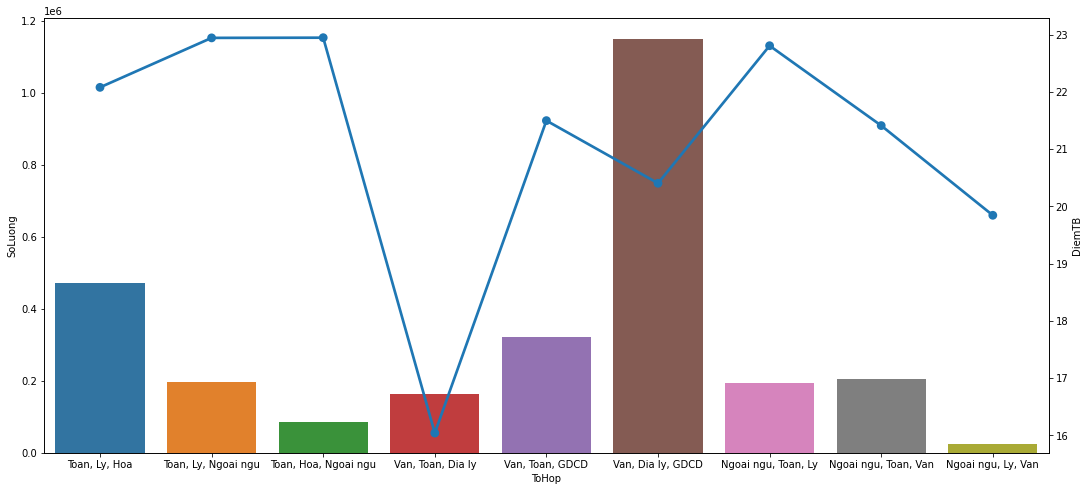

In [57]:
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df1,
            x="ToHop",
            y="SoLuong")
ax1=ax.twinx()
sns.pointplot(data=df1,
            x="ToHop",
            y="DiemTB",
            ax=ax1)

***Nhận xét với các tổ hợp môn mà thí sinh đạt điểm cao nhất:***
- Số lượng thí sinh lớn nhất là tổ hợp Văn - Địa - GDCD
- Số lượng thí sinh đạt nhỏ nhất là tổ hợp Văn - Ngoại ngữ - Lý
- Đạt được điểm trung bình cao nhất là : Toán - Lý - Ngoại ngữ và Toán - Hóa - Ngoại ngữ
- Đạt được điểm trung bình thấp nhất là : Toán - Văn - Địa

**Câu 8:**
So sánh điểm số của trước khi covid và sau khi covid, cụ thể là năm 2019 và 2020

Text(0.5, 1.0, 'Điểm trung bình các môn học năm 2019, năm 2020')

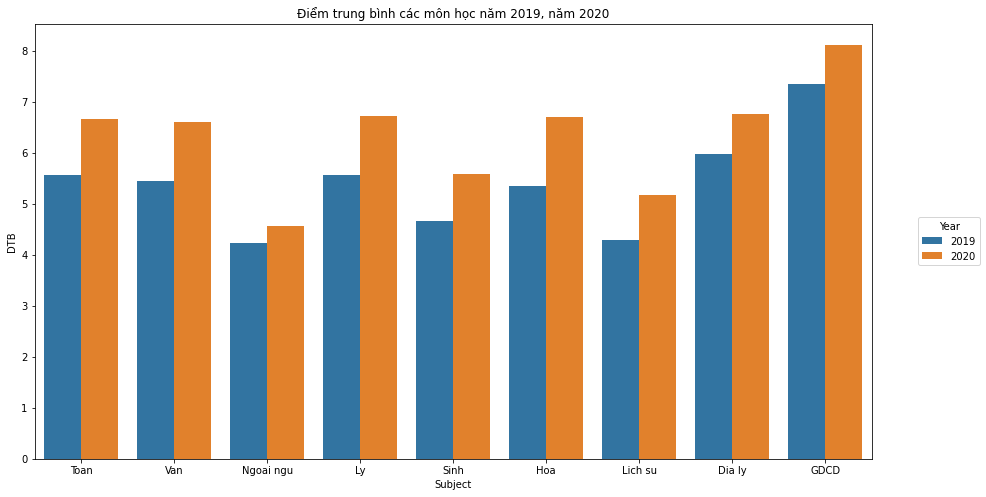

In [58]:

df1=df[(df['Year']==2019) | (df['Year'] == 2020)]
df1=df1.groupby(['Year'])[subjects].mean()
df1.reset_index(inplace=True)
df1=df1.melt(id_vars=["Year"],var_name="Subject",value_name="DTB")
plt.figure(figsize = (15,8))
sns.barplot(data=df1,
            x="Subject",
            y="DTB",
            hue="Year",
            )
plt.legend(title="Year", loc="center left",bbox_to_anchor=(1.05,0.5))
plt.title("Điểm trung bình các môn học năm 2019, năm 2020")

**Câu 9:**
Hãy tìm ra sự khác biệt trọng điểm số của người dân ở vùng kinh tế trọng điểm (như TPHCM, HN) và người dân ở những Tỉnh vẫn còn kém phát triển về kinh tế

In [59]:
poor_cities = ['TỈNH ĐIỆN BIÊN	','TỈNH HÀ GIANG','TỈNH CAO BẰNG','TỈNH BẮC KẠN','TỈNH KON TUM','TỈNH SƠN LA','TỈNH LAI CHÂU']

In [60]:
df_cities[df_cities['TenTinh']==poor_cities[6]]

,MaTinh,TenTinh,2017,2018,2019,2020,2021,2022
6,7,TỈNH LAI CHÂU,3328,3232,3231,3298,3563,3661


continuous...

# Còn tiếp ....
hãy trả lời giừm tớ đuy